# Análise Exploratória dos Dados

## Importando pacotes e Bibliotecas

In [73]:
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Link para o dataset principal

[Dataset principal - main.ipynb](./main.ipynb)

## Índice

- [Dataset Iris](#dataset-iris)
- [Dataset Titanic](#dataset-titanic)
- [Dataset Doença do Coração](#dataset-coracao)

## Importando os Datasets

In [74]:
df_iris_raw = pd.read_csv("./databases/raw/Iris.csv", sep = ",", index_col = "Id")
df_titanic_processed = pd.read_pickle("./databases/processed/titanic_processado.pkl")
df_coracao_processed = pd.read_pickle("./databases/processed/coracao_processado.pkl")

## Breve apresentacao dos datasets

In [75]:
df_iris_raw.sample(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
98,6.2,2.9,4.3,1.3,Iris-versicolor
32,5.4,3.4,1.5,0.4,Iris-setosa
42,4.5,2.3,1.3,0.3,Iris-setosa
12,4.8,3.4,1.6,0.2,Iris-setosa
72,6.1,2.8,4.0,1.3,Iris-versicolor
145,6.7,3.3,5.7,2.5,Iris-virginica
34,5.5,4.2,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
108,7.3,2.9,6.3,1.8,Iris-virginica


In [76]:
df_titanic_processed.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Fare,Embarked
PassengerId,,,,,,,,
499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25,1,151.550003,2
541,1,1,"Crosby, Miss. Harriet R",0,36,0,71.000000,2
854,1,1,"Lines, Miss. Mary Conover",0,16,0,39.400002,2
237,0,2,"Hold, Mr. Stephen",1,44,1,26.000000,2
867,1,2,"Duran y More, Miss. Asuncion",0,27,1,13.858300,0
822,1,3,"Lulic, Mr. Nikola",1,27,0,8.662500,2
402,0,3,"Adams, Mr. John",1,26,0,8.050000,2
59,1,2,"West, Miss. Constance Mirium",0,5,1,27.750000,2
270,1,1,"Bissette, Miss. Amelia",0,35,0,135.633301,2


In [77]:
df_coracao_processed.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
144,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2,1
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3,0
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
144,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
144,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
150,66,1,0,160,228,0,0,138,0,2.3,2,0,1,1
131,49,0,1,134,271,0,1,162,0,0.0,1,0,2,1


In [78]:
df_iris_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [79]:
df_titanic_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1473 entries, 1 to 724
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  1473 non-null   category
 1   Pclass    1473 non-null   category
 2   Name      1473 non-null   string  
 3   Sex       1473 non-null   category
 4   Age       1473 non-null   uint8   
 5   SibSp     1473 non-null   uint8   
 6   Fare      1473 non-null   float32 
 7   Embarked  1473 non-null   category
dtypes: category(4), float32(1), string(1), uint8(2)
memory usage: 37.5 KB


In [80]:
df_coracao_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 456 entries, 1 to 289
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       456 non-null    uint8   
 1   sex       456 non-null    category
 2   cp        456 non-null    category
 3   trestbps  456 non-null    uint8   
 4   chol      456 non-null    uint16  
 5   fbs       456 non-null    category
 6   restecg   456 non-null    category
 7   thalach   456 non-null    uint8   
 8   exang     456 non-null    category
 9   oldpeak   456 non-null    float32 
 10  slope     456 non-null    category
 11  ca        456 non-null    category
 12  thal      456 non-null    category
 13  target    456 non-null    category
dtypes: category(9), float32(1), uint16(1), uint8(3)
memory usage: 11.8 KB


## AED

### Dataset Iris

In [81]:
df_frequencia_distribuicao_especies = pd.crosstab(index = df_iris_raw["Species"], columns = "quantidade")
df_frequencia_distribuicao_especies

col_0,quantidade
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


#### Separando as especies em datasets especificos

In [82]:
df_setosa = df_iris_raw.loc[df_iris_raw["Species"] == "Iris-setosa"]
df_versicolor = df_iris_raw.loc[df_iris_raw["Species"] == "Iris-versicolor"]
df_virginica = df_iris_raw.loc[df_iris_raw["Species"] == "Iris-virginica"]

#### Imprimindo os gráficos

##### Histograma

<Figure size 2000x1200 with 0 Axes>

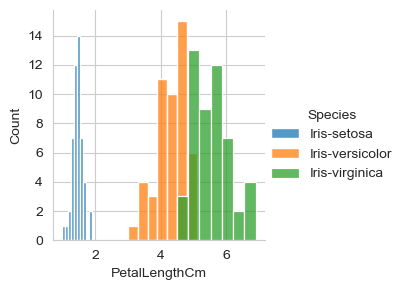

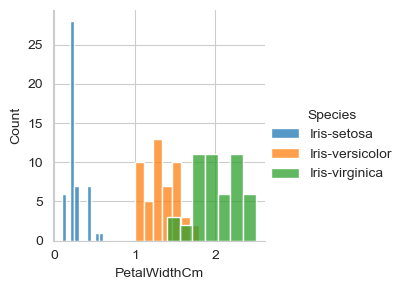

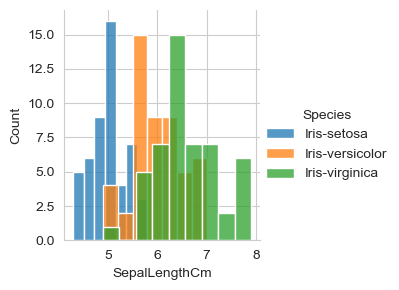

In [83]:
plt.figure(figsize = (20, 12))

sns.FacetGrid(df_iris_raw, hue = "Species", height = 3).map(sns.histplot, "PetalLengthCm").add_legend()
sns.FacetGrid(df_iris_raw, hue = "Species", height = 3).map(sns.histplot, "PetalWidthCm").add_legend()
sns.FacetGrid(df_iris_raw, hue = "Species", height = 3).map(sns.histplot, "SepalLengthCm").add_legend()

plt.show()

##### Boxplot

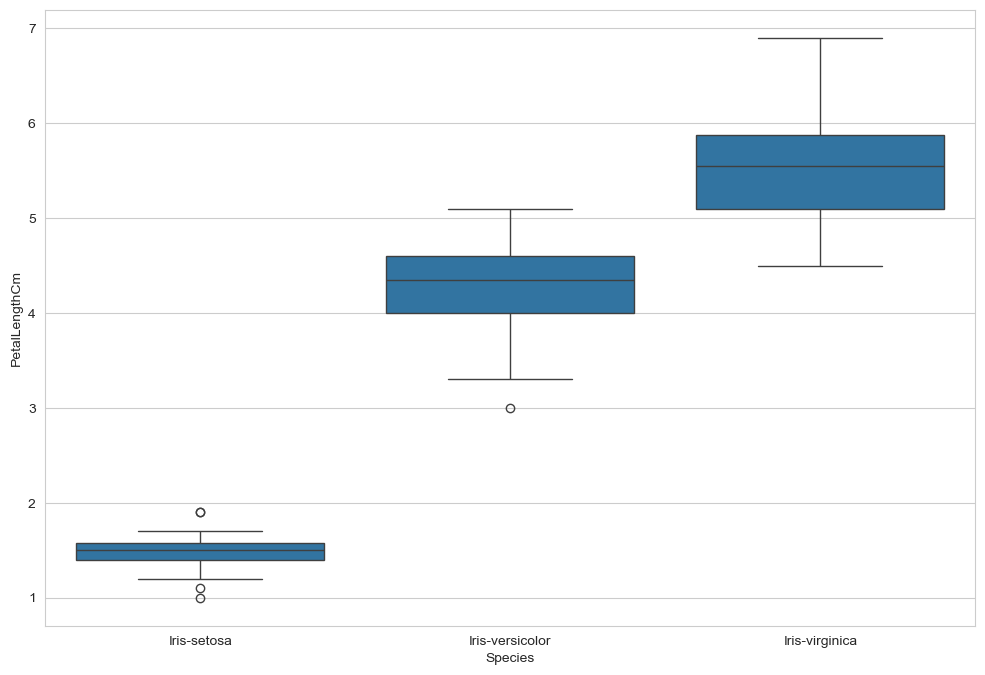

In [84]:
plt.figure(figsize = (12, 8))

sns.boxplot(data = df_iris_raw, x = "Species", y = "PetalLengthCm")

plt.show()

##### Violinplot

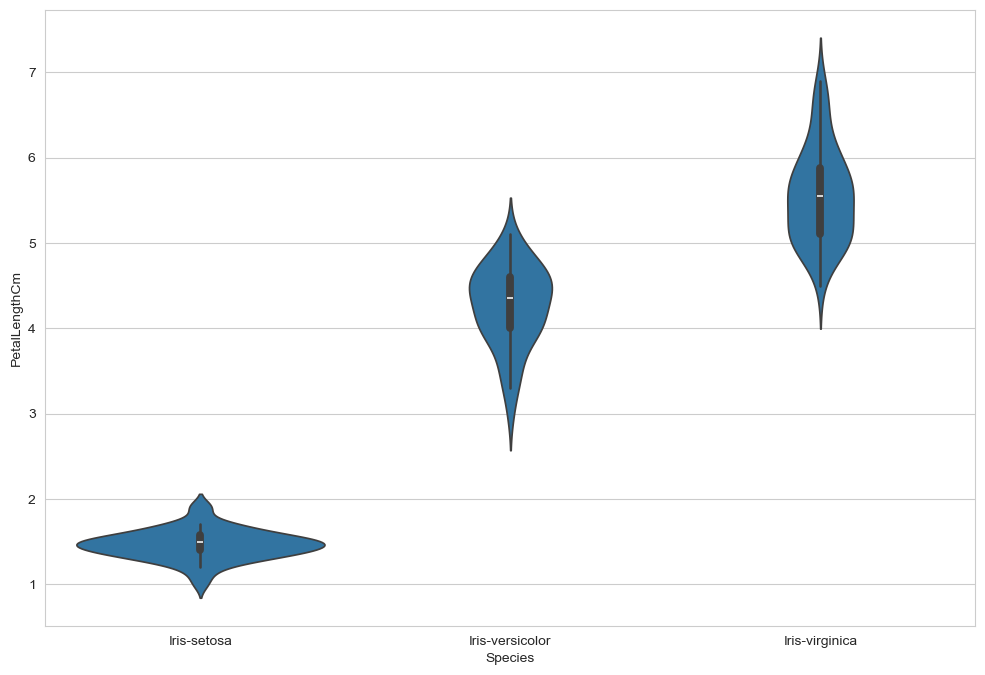

In [85]:
plt.figure(figsize = (12, 8))

sns.violinplot(data = df_iris_raw, x = "Species", y = "PetalLengthCm")

plt.show()

##### Gráfico de dispersão

<Figure size 2000x1200 with 0 Axes>

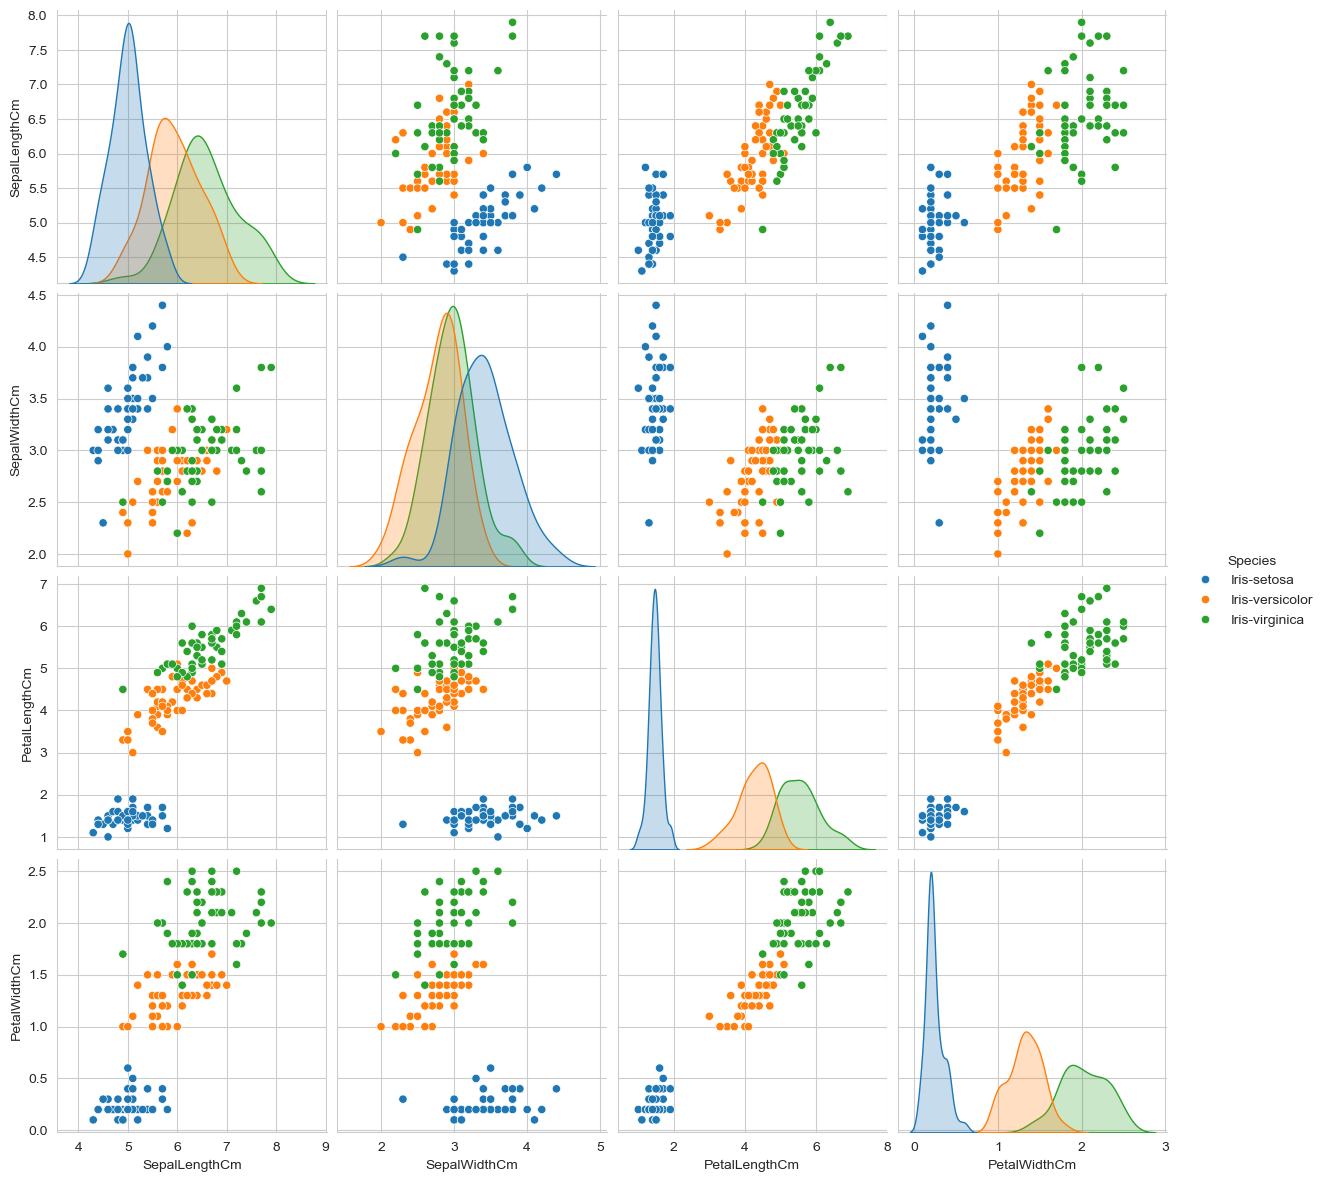

In [86]:
plt.figure(figsize = (20, 12))

sns.set_style("whitegrid")
sns.pairplot(df_iris_raw, hue = "Species", height = 3)

plt.show()

### Dataset Titanic

In [87]:
df_frequencia_distribuicao_classes = pd.crosstab(index = df_titanic_processed["Pclass"], columns = "quantidade")
df_frequencia_distribuicao_classes

col_0,quantidade
Pclass,
1,491
2,491
3,491


#### Separando as classes em datasets especificos

In [88]:
df_Pclass_1 = df_titanic_processed.loc[df_titanic_processed["Pclass"] == 1]
df_Pclass_2 = df_titanic_processed.loc[df_titanic_processed["Pclass"] == 2]
df_Pclass_3 = df_titanic_processed.loc[df_titanic_processed["Pclass"] == 3]

#### Imprimindo os gráficos

##### Histograma

<Figure size 2000x1200 with 0 Axes>

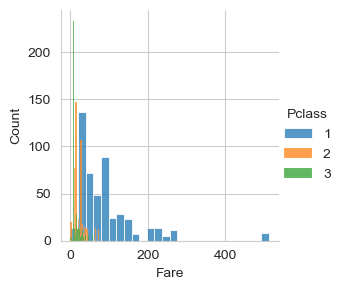

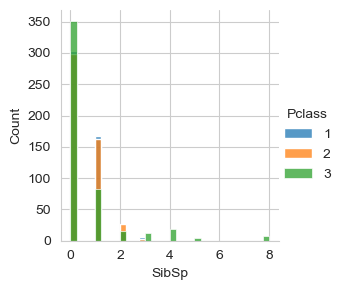

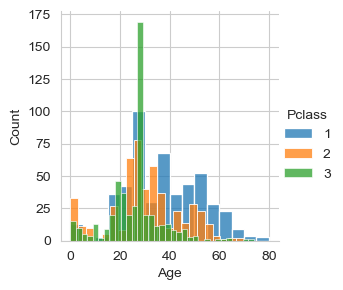

In [89]:
plt.figure(figsize = (20, 12))

sns.FacetGrid(df_titanic_processed, hue = "Pclass", height = 3).map(sns.histplot, "Fare").add_legend()
sns.FacetGrid(df_titanic_processed, hue = "Pclass", height = 3).map(sns.histplot, "SibSp").add_legend()
sns.FacetGrid(df_titanic_processed, hue = "Pclass", height = 3).map(sns.histplot, "Age").add_legend()

plt.show()

##### Boxplot

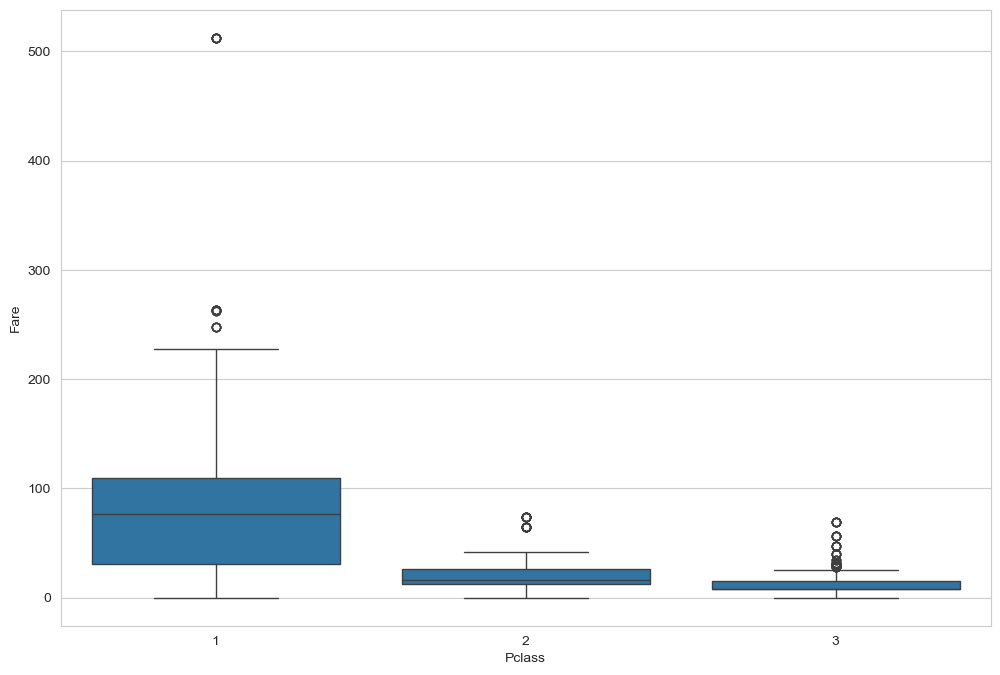

In [90]:
plt.figure(figsize = (12, 8))

sns.boxplot(data = df_titanic_processed, x = "Pclass", y = "Fare")

plt.show()

##### Violinplot

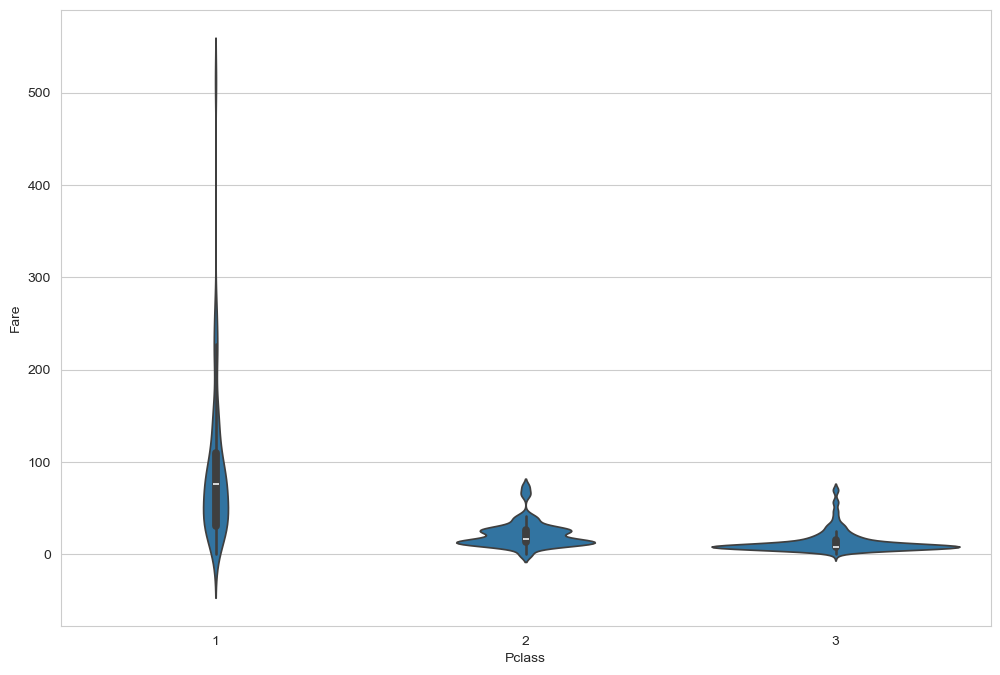

In [91]:
plt.figure(figsize = (12, 8))

sns.violinplot(data = df_titanic_processed, x = "Pclass", y = "Fare")

plt.show()

##### Gráfico de dispersão

<Figure size 2000x1200 with 0 Axes>

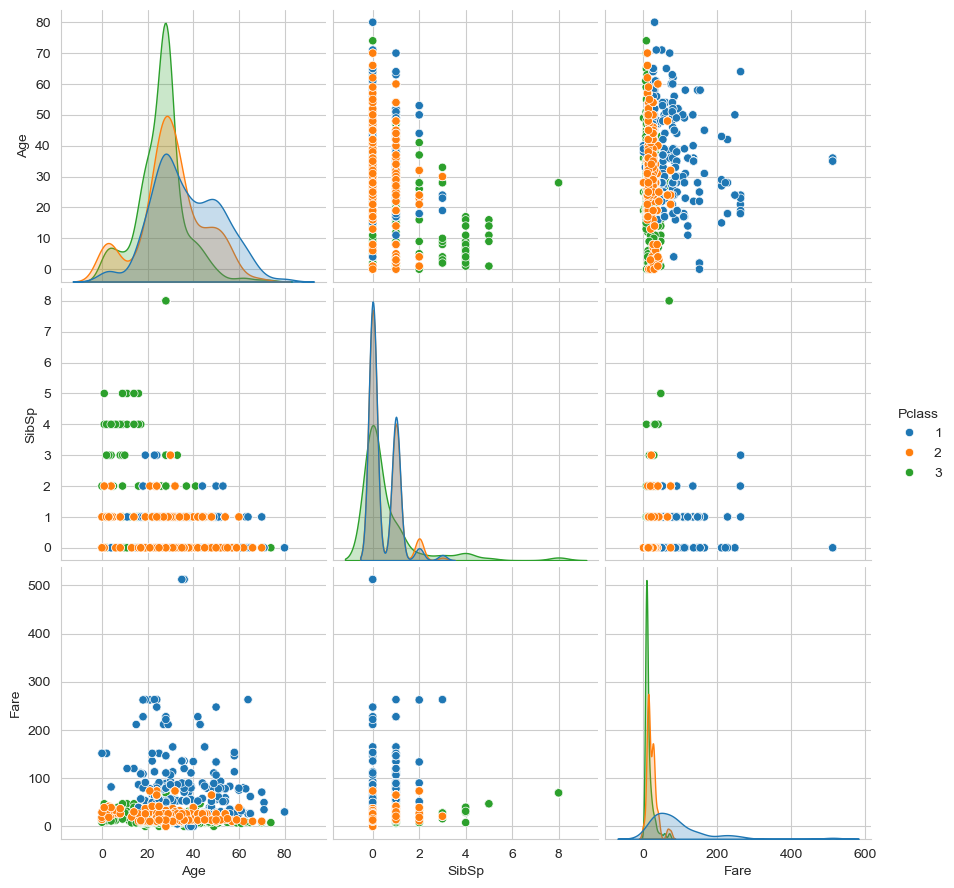

In [92]:
plt.figure(figsize = (20, 12))

sns.set_style("whitegrid")
sns.pairplot(df_titanic_processed, hue = "Pclass", height = 3)

plt.show()

### Dataset Coracao

In [93]:
df_frequencia_restcg = pd.crosstab(index = df_coracao_processed["restecg"], columns = "quantidade")
df_frequencia_restcg

col_0,quantidade
restecg,
0,152
1,152
2,152


#### Separando as classes em datasets especificos

In [95]:
df_restecg_0 = df_coracao_processed.loc[df_coracao_processed["restecg"] == 0]
df_restecg_1 = df_coracao_processed.loc[df_coracao_processed["restecg"] == 1]
df_restecg_2 = df_coracao_processed.loc[df_coracao_processed["restecg"] == 2]

#### Imprimindo os gráficos

##### Histograma

<Figure size 2000x1200 with 0 Axes>

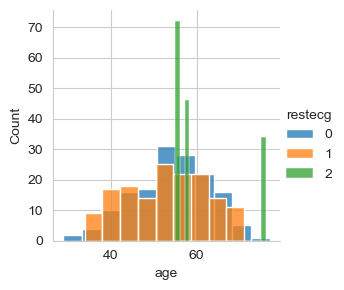

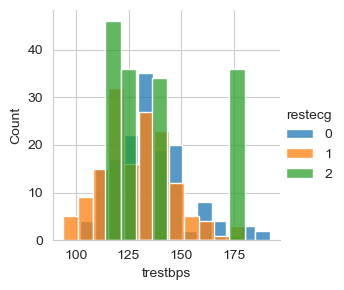

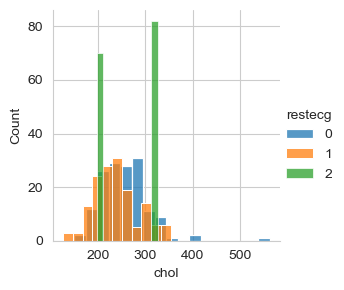

In [96]:
plt.figure(figsize = (20, 12))

sns.FacetGrid(df_coracao_processed, hue = "restecg", height = 3).map(sns.histplot, "age").add_legend()
sns.FacetGrid(df_coracao_processed, hue = "restecg", height = 3).map(sns.histplot, "trestbps").add_legend()
sns.FacetGrid(df_coracao_processed, hue = "restecg", height = 3).map(sns.histplot, "chol").add_legend()

plt.show()

##### Boxplot

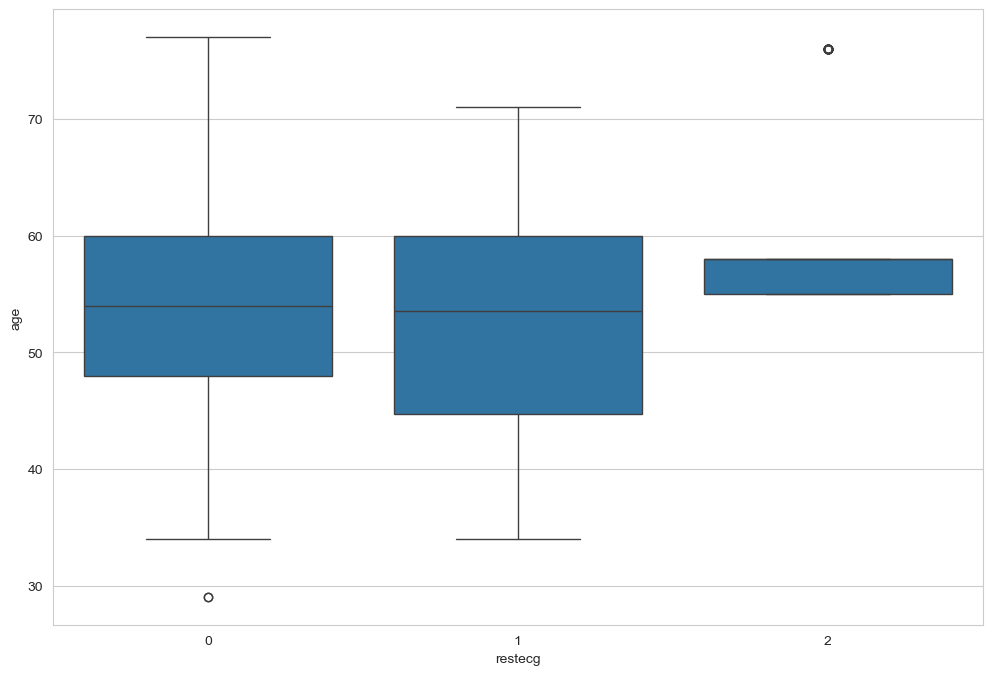

In [97]:
plt.figure(figsize = (12, 8))

sns.boxplot(data = df_coracao_processed, x = "restecg", y = "age")

plt.show()

##### Violinplot

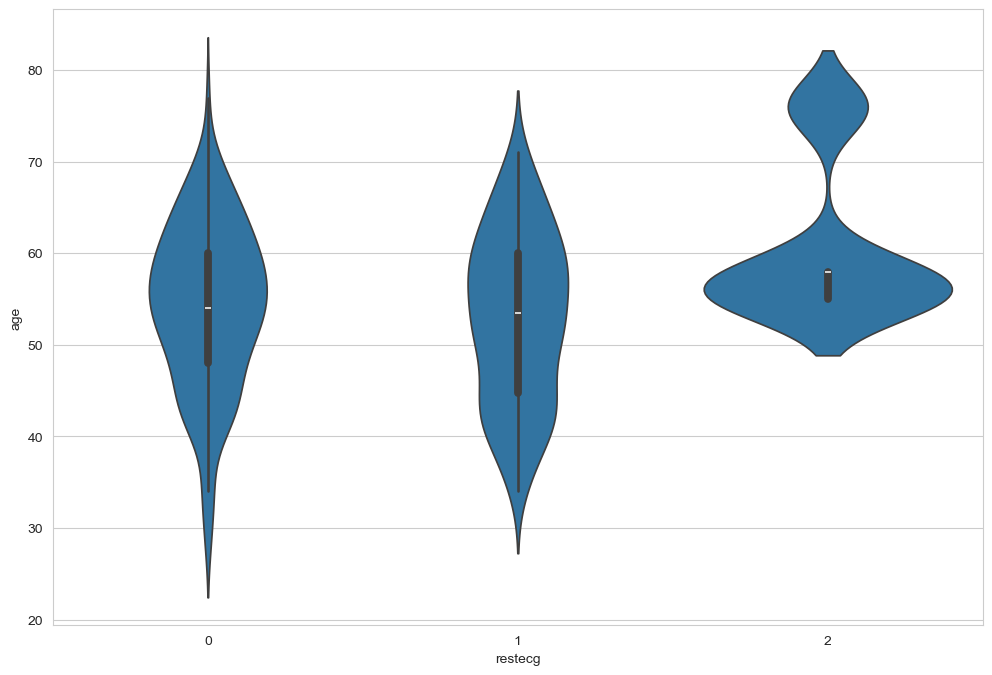

In [98]:
plt.figure(figsize = (12, 8))

sns.violinplot(data = df_coracao_processed, x = "restecg", y = "age")

plt.show()

##### Gráfico de dispersão

<Figure size 2000x1200 with 0 Axes>

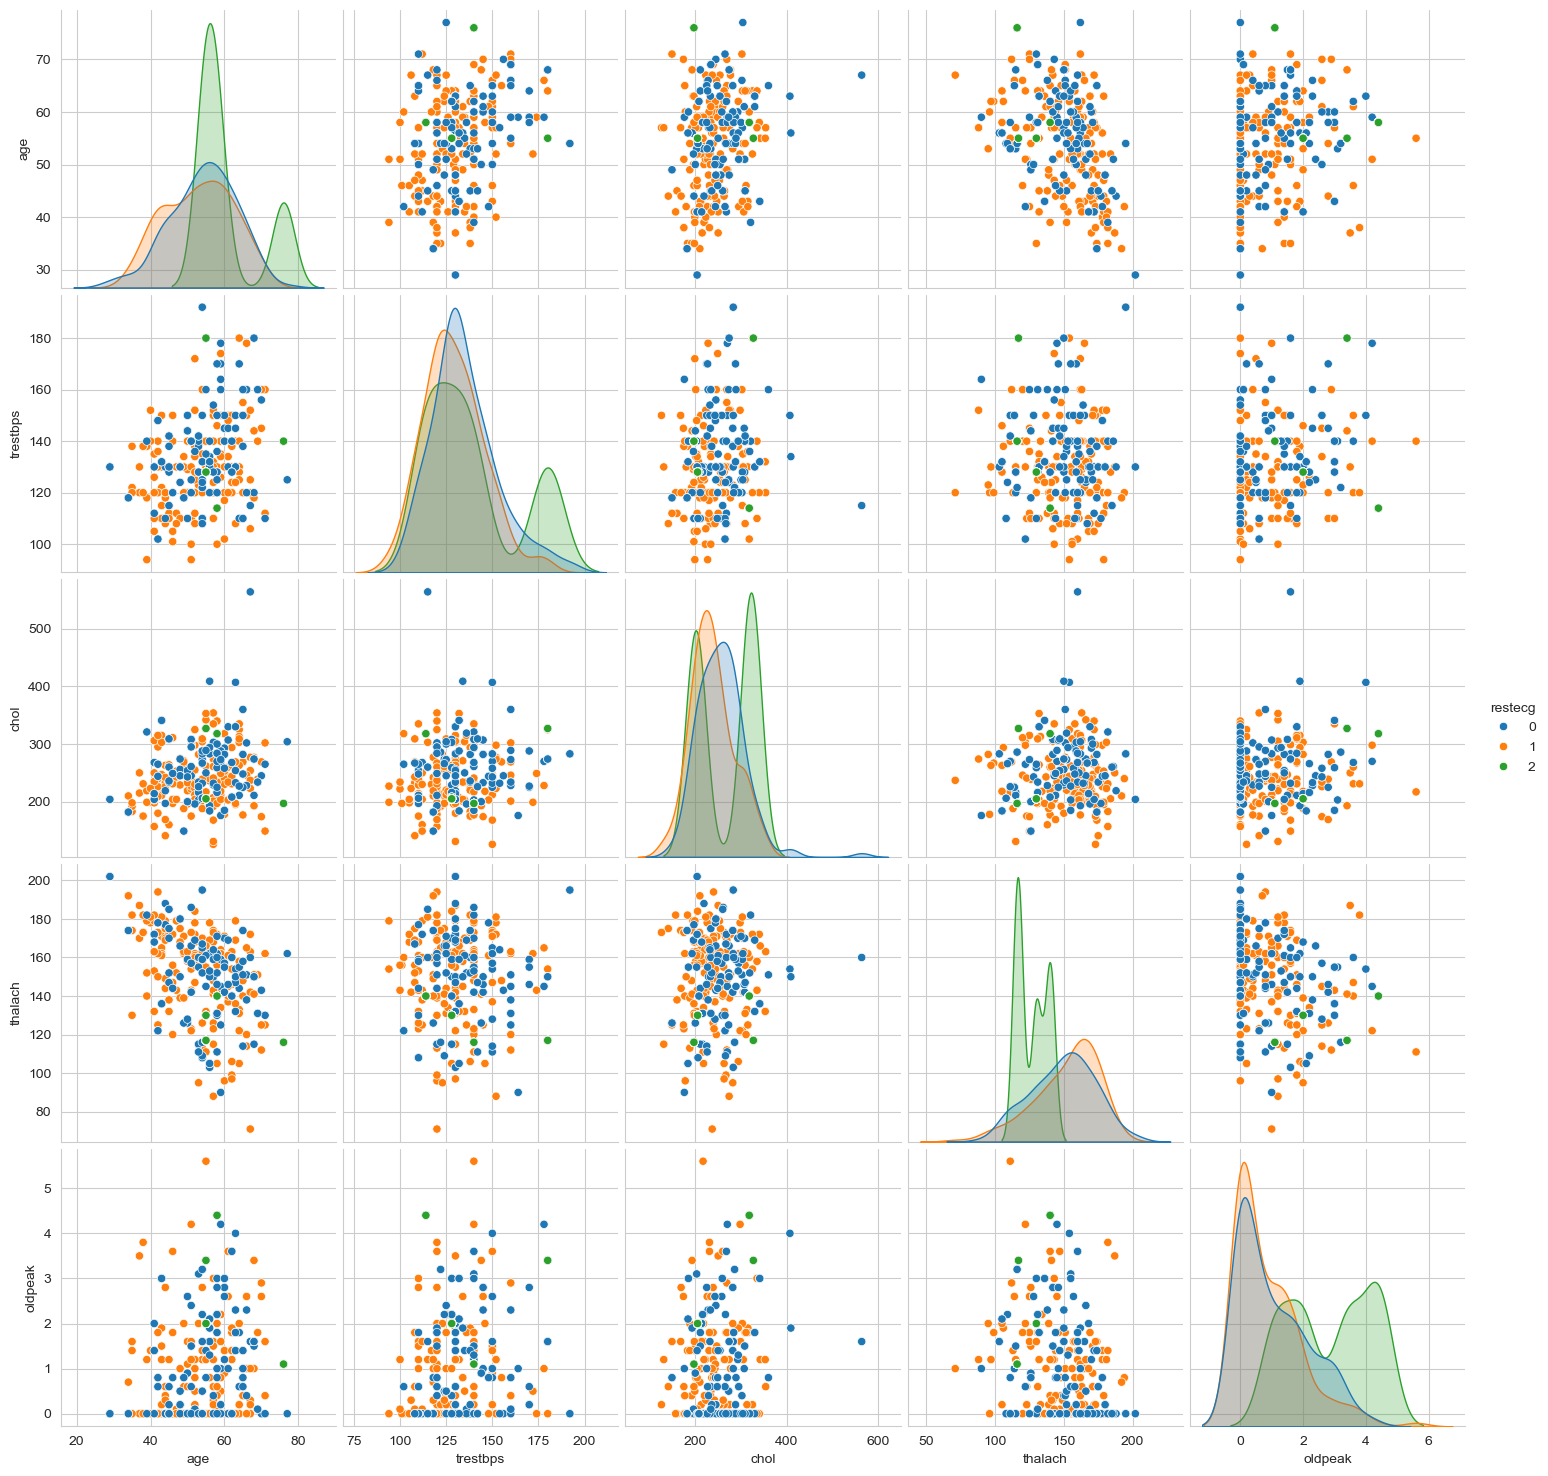

In [99]:
plt.figure(figsize = (20, 12))

sns.set_style("whitegrid")
sns.pairplot(df_coracao_processed, hue = "restecg", height = 3)

plt.show()